In [921]:
import pandas as pd

In [922]:
hopital1 = pd.read_json("liver.json")

In [923]:
display(hopital1.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,61 to 80 yo,Female,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1
3,41 to 60 yo,Male,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1
4,61 to 80 yo,Male,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1


In [924]:
hopital2 = pd.read_csv("liver.csv")
display(hopital2.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Result
0,41 to 60 yo,Male,7.0,2.0,174.0,NaN,14,7800.0 mg/dL,4.2,NaN,2
1,41 to 60 yo,Male,6.0,2.0,245.0,22.0,24,7100.0 mg/dL,3.4,0.9,1
2,21 to 40 yo,Male,11.0,5.0,191.0,37.0,41,7700.0 mg/dL,4.3,NaN,2
3,21 to 40 yo,Male,24.0,10.0,340.0,25.0,21,8300.0 mg/dL,4.5,NaN,1
4,21 to 40 yo,Male,6.0,2.0,202.0,NaN,41,8000.0 mg/dL,3.9,0.9,1


In [925]:

hopital1.rename(columns={
    'Alamine_Aminotransferase': 'ALT',
    'Aspartate_Aminotransferase': 'AST',
    'Albumin_and_Globulin_Ratio': 'AGR'
}, inplace=True)

hopital2.rename(columns={
    'Result': 'Outcome', 
    'Albumin_and_Globulin_Ratio': 'AGR'
}, inplace=True)

In [926]:
display(hopital1.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,61 to 80 yo,Female,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1
3,41 to 60 yo,Male,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1
4,61 to 80 yo,Male,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1


In [927]:
display(hopital2.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,41 to 60 yo,Male,7.0,2.0,174.0,NaN,14,7800.0 mg/dL,4.2,NaN,2
1,41 to 60 yo,Male,6.0,2.0,245.0,22.0,24,7100.0 mg/dL,3.4,0.9,1
2,21 to 40 yo,Male,11.0,5.0,191.0,37.0,41,7700.0 mg/dL,4.3,NaN,2
3,21 to 40 yo,Male,24.0,10.0,340.0,25.0,21,8300.0 mg/dL,4.5,NaN,1
4,21 to 40 yo,Male,6.0,2.0,202.0,NaN,41,8000.0 mg/dL,3.9,0.9,1


In [928]:
print(hopital2.dtypes)

Age                      object
Gender                   object
Total_Bilirubin         float64
Direct_Bilirubin        float64
Alkaline_Phosphotase    float64
ALT                     float64
AST                       int64
Total_Proteins           object
Albumin                 float64
AGR                     float64
Outcome                   int64
dtype: object


In [929]:
#Transformation concernant la colonne Total_Proteins
# 2. Suppression de l'unité " mg/dL"
# On s'assure que toutes les valeurs sont des chaînes de caractères avant d'appliquer la suppression.
hopital2['Total_Proteins'] = hopital2['Total_Proteins'].astype(str).str.replace(' mg/dL', '', regex=False)

# 3. Conversion de la colonne en type numérique (float)
# 'errors="coerce"' convertit toute valeur non numérique restante en NaN (valeur manquante).
hopital2['Total_Proteins'] = pd.to_numeric(hopital2['Total_Proteins'], errors='coerce')

# 4. Affichage des résultats pour vérification
print("Type de données de la colonne 'Total_Proteins' après nettoyage :")
print(hopital2['Total_Proteins'].dtype)

print("\nPremières valeurs de la colonne 'Total_Proteins' après nettoyage :")
print(hopital2['Total_Proteins'].head())

Type de données de la colonne 'Total_Proteins' après nettoyage :
float64

Premières valeurs de la colonne 'Total_Proteins' après nettoyage :
0    7800.0
1    7100.0
2    7700.0
3    8300.0
4    8000.0
Name: Total_Proteins, dtype: float64


In [930]:
import pandas as pd

def mg_par_dl_vers_g_par_dl(valeur_mg_par_dl):
    """
    Convertit une valeur de milligrammes par décilitre (mg/dL) en 
    grammes par décilitre (g/dL).

    Args:
        valeur_mg_par_dl (float/int): La concentration en mg/dL.

    Returns:
        float: La concentration convertie en g/dL.
    """
    # Si la valeur est nulle (NaN), on la retourne telle quelle
    if pd.isna(valeur_mg_par_dl):
        return valeur_mg_par_dl
    
    # Division par 1000 pour la conversion (1g = 1000mg)
    return valeur_mg_par_dl / 1000

In [931]:
hopital2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,41 to 60 yo,Male,7.0,2.0,174.0,NaN,14,7800.0,4.2,NaN,2
1,41 to 60 yo,Male,6.0,2.0,245.0,22.0,24,7100.0,3.4,0.9,1
2,21 to 40 yo,Male,11.0,5.0,191.0,37.0,41,7700.0,4.3,NaN,2
3,21 to 40 yo,Male,24.0,10.0,340.0,25.0,21,8300.0,4.5,NaN,1
4,21 to 40 yo,Male,6.0,2.0,202.0,NaN,41,8000.0,3.9,0.9,1


In [932]:
hopital2['Total_Proteins'] = hopital2['Total_Proteins'] / 1000

In [933]:
hopital1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,61 to 80 yo,Female,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1
3,41 to 60 yo,Male,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1
4,61 to 80 yo,Male,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
286,21 to 40 yo,Female,0.8,0.2,192.0,15.0,12,8.6,4.7,1.20,1
287,41 to 60 yo,Male,1.3,0.6,155.0,15.0,20,8.0,4.0,1.00,2
288,41 to 60 yo,Female,1.0,0.5,239.0,16.0,39,7.5,3.7,NaN,1
289,41 to 60 yo,Male,4.5,2.3,315.0,120.0,105,7.0,4.0,NaN,1


In [934]:
#Tranformation de la colonne Age
print("Valeurs uniques de 'Age' avant normalisation :")
print(hopital2['Age'].unique())

Valeurs uniques de 'Age' avant normalisation :
['41 to 60 yo' '21 to 40 yo' '61 to 80 yo' '<20 yo' '>80 yo']


In [935]:
print("Valeurs uniques de 'Age' avant normalisation :")
print(hopital1['Age'].unique())

Valeurs uniques de 'Age' avant normalisation :
['61 to 80 yo' '41 to 60 yo' '21 to 40 yo' '<20 yo' '>80 yo']


In [936]:
# 1. Dictionnaire de mapping ordinal
age_mapping = {
    '<20 yo': 1,
    '21 to 40 yo': 2,
    '41 to 60 yo': 3,
    '61 to 80 yo': 4,
    '81 to 100 yo': 5
}

# 2. Fonction pour encoder l'âge
def encode_age(df):
    df['Age'] = df['Age'].map(age_mapping)
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    return df

# 3. Application aux deux DataFrames
hopital1 = encode_age(hopital1)
hopital2 = encode_age(hopital2)

# Vérification
print("Types après encodage:")
print(f"Hopital1 Age: {hopital1['Age'].dtype}")
print(f"Hopital2 Age: {hopital2['Age'].dtype}")


Types après encodage:
Hopital1 Age: float64
Hopital2 Age: float64


In [937]:
import numpy as np

# Pour hopital2
hopital2['Age'] = hopital2['Age'].fillna(-999).astype(int).replace(-999, np.nan)
hopital2['Age'] = hopital2['Age'].astype('Int64')

# Pour hopital1
hopital1['Age'] = hopital1['Age'].fillna(-999).astype(int).replace(-999, np.nan)
hopital1['Age'] = hopital1['Age'].astype('Int64')
hopital1['Alkaline_Phosphotase'] = hopital1['Alkaline_Phosphotase'].fillna(-999).astype(int).replace(-999, np.nan)
hopital1['Alkaline_Phosphotase'] = hopital1['Alkaline_Phosphotase'].astype('Int64')

# Pour Alkaline_Phosphotase dans hopital2
hopital2['Alkaline_Phosphotase'] = hopital2['Alkaline_Phosphotase'].fillna(-999).astype(int).replace(-999, np.nan)
hopital2['Alkaline_Phosphotase'] = hopital2['Alkaline_Phosphotase'].astype('Int64')

In [938]:
hopital2.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,3,Male,7.0,2.0,174,NaN,14,7.8,4.2,NaN,2
1,3,Male,6.0,2.0,245,22.0,24,7.1,3.4,0.9,1
2,2,Male,11.0,5.0,191,37.0,41,7.7,4.3,NaN,2
3,2,Male,24.0,10.0,340,25.0,21,8.3,4.5,NaN,1
4,2,Male,6.0,2.0,202,NaN,41,8.0,3.9,0.9,1


In [939]:
hopital1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,4,Female,0.7,0.1,187,NaN,18,6.8,3.3,0.90,1
1,4,Male,10.9,5.5,699,64.0,100,7.5,NaN,0.74,1
2,4,Male,7.3,4.1,490,NaN,68,7.0,3.3,NaN,1
3,3,Male,1.0,0.4,182,14.0,20,6.8,3.4,1.00,1
4,4,Male,3.9,2.0,195,27.0,59,7.3,2.4,0.40,1


In [940]:
hopital1['Gender'] = hopital1['Gender'].map({'Male': 1, 'Female': 0})
hopital1['Gender'] = hopital1['Gender'].fillna(-999).astype(int).replace(-999, np.nan)
hopital1['Gender'] = hopital1['Gender'].astype('Int64')

# Pour hopital2
hopital2['Gender'] = hopital2['Gender'].map({'Male': 1, 'Female': 0})
hopital2['Gender'] = hopital2['Gender'].fillna(-999).astype(int).replace(-999, np.nan)
hopital2['Gender'] = hopital2['Gender'].astype('Int64')

In [941]:
hopital1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,4,0,0.7,0.1,187,NaN,18,6.8,3.3,0.90,1
1,4,1,10.9,5.5,699,64.0,100,7.5,NaN,0.74,1
2,4,1,7.3,4.1,490,NaN,68,7.0,3.3,NaN,1
3,3,1,1.0,0.4,182,14.0,20,6.8,3.4,1.00,1
4,4,1,3.9,2.0,195,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
286,2,0,0.8,0.2,192,15.0,12,8.6,4.7,1.20,1
287,3,1,1.3,0.6,155,15.0,20,8.0,4.0,1.00,2
288,3,0,1.0,0.5,239,16.0,39,7.5,3.7,NaN,1
289,3,1,4.5,2.3,315,120.0,105,7.0,4.0,NaN,1


In [942]:
df_combined = pd.concat([hopital1, hopital2], ignore_index=True)

df_combined


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,4,0,0.7,0.1,187,NaN,18,6.8,3.3,0.90,1
1,4,1,10.9,5.5,699,64.0,100,7.5,NaN,0.74,1
2,4,1,7.3,4.1,490,NaN,68,7.0,3.3,NaN,1
3,3,1,1.0,0.4,182,14.0,20,6.8,3.4,1.00,1
4,4,1,3.9,2.0,195,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,14.0,5.0,269,58.0,45,6.7,3.9,1.40,1
608,4,1,7.0,1.0,196,20.0,35,5.8,2.0,0.50,1
609,4,1,28.0,13.0,250,NaN,29,2.7,0.9,0.50,1
610,3,1,9.0,3.0,901,23.0,17,6.2,3.5,1.20,1


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>],
       [<Axes: title={'center': 'Direct_Bilirubin'}>,
        <Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'ALT'}>],
       [<Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'Total_Proteins'}>,
        <Axes: title={'center': 'Albumin'}>],
       [<Axes: title={'center': 'AGR'}>,
        <Axes: title={'center': 'Outcome'}>, <Axes: >]], dtype=object)

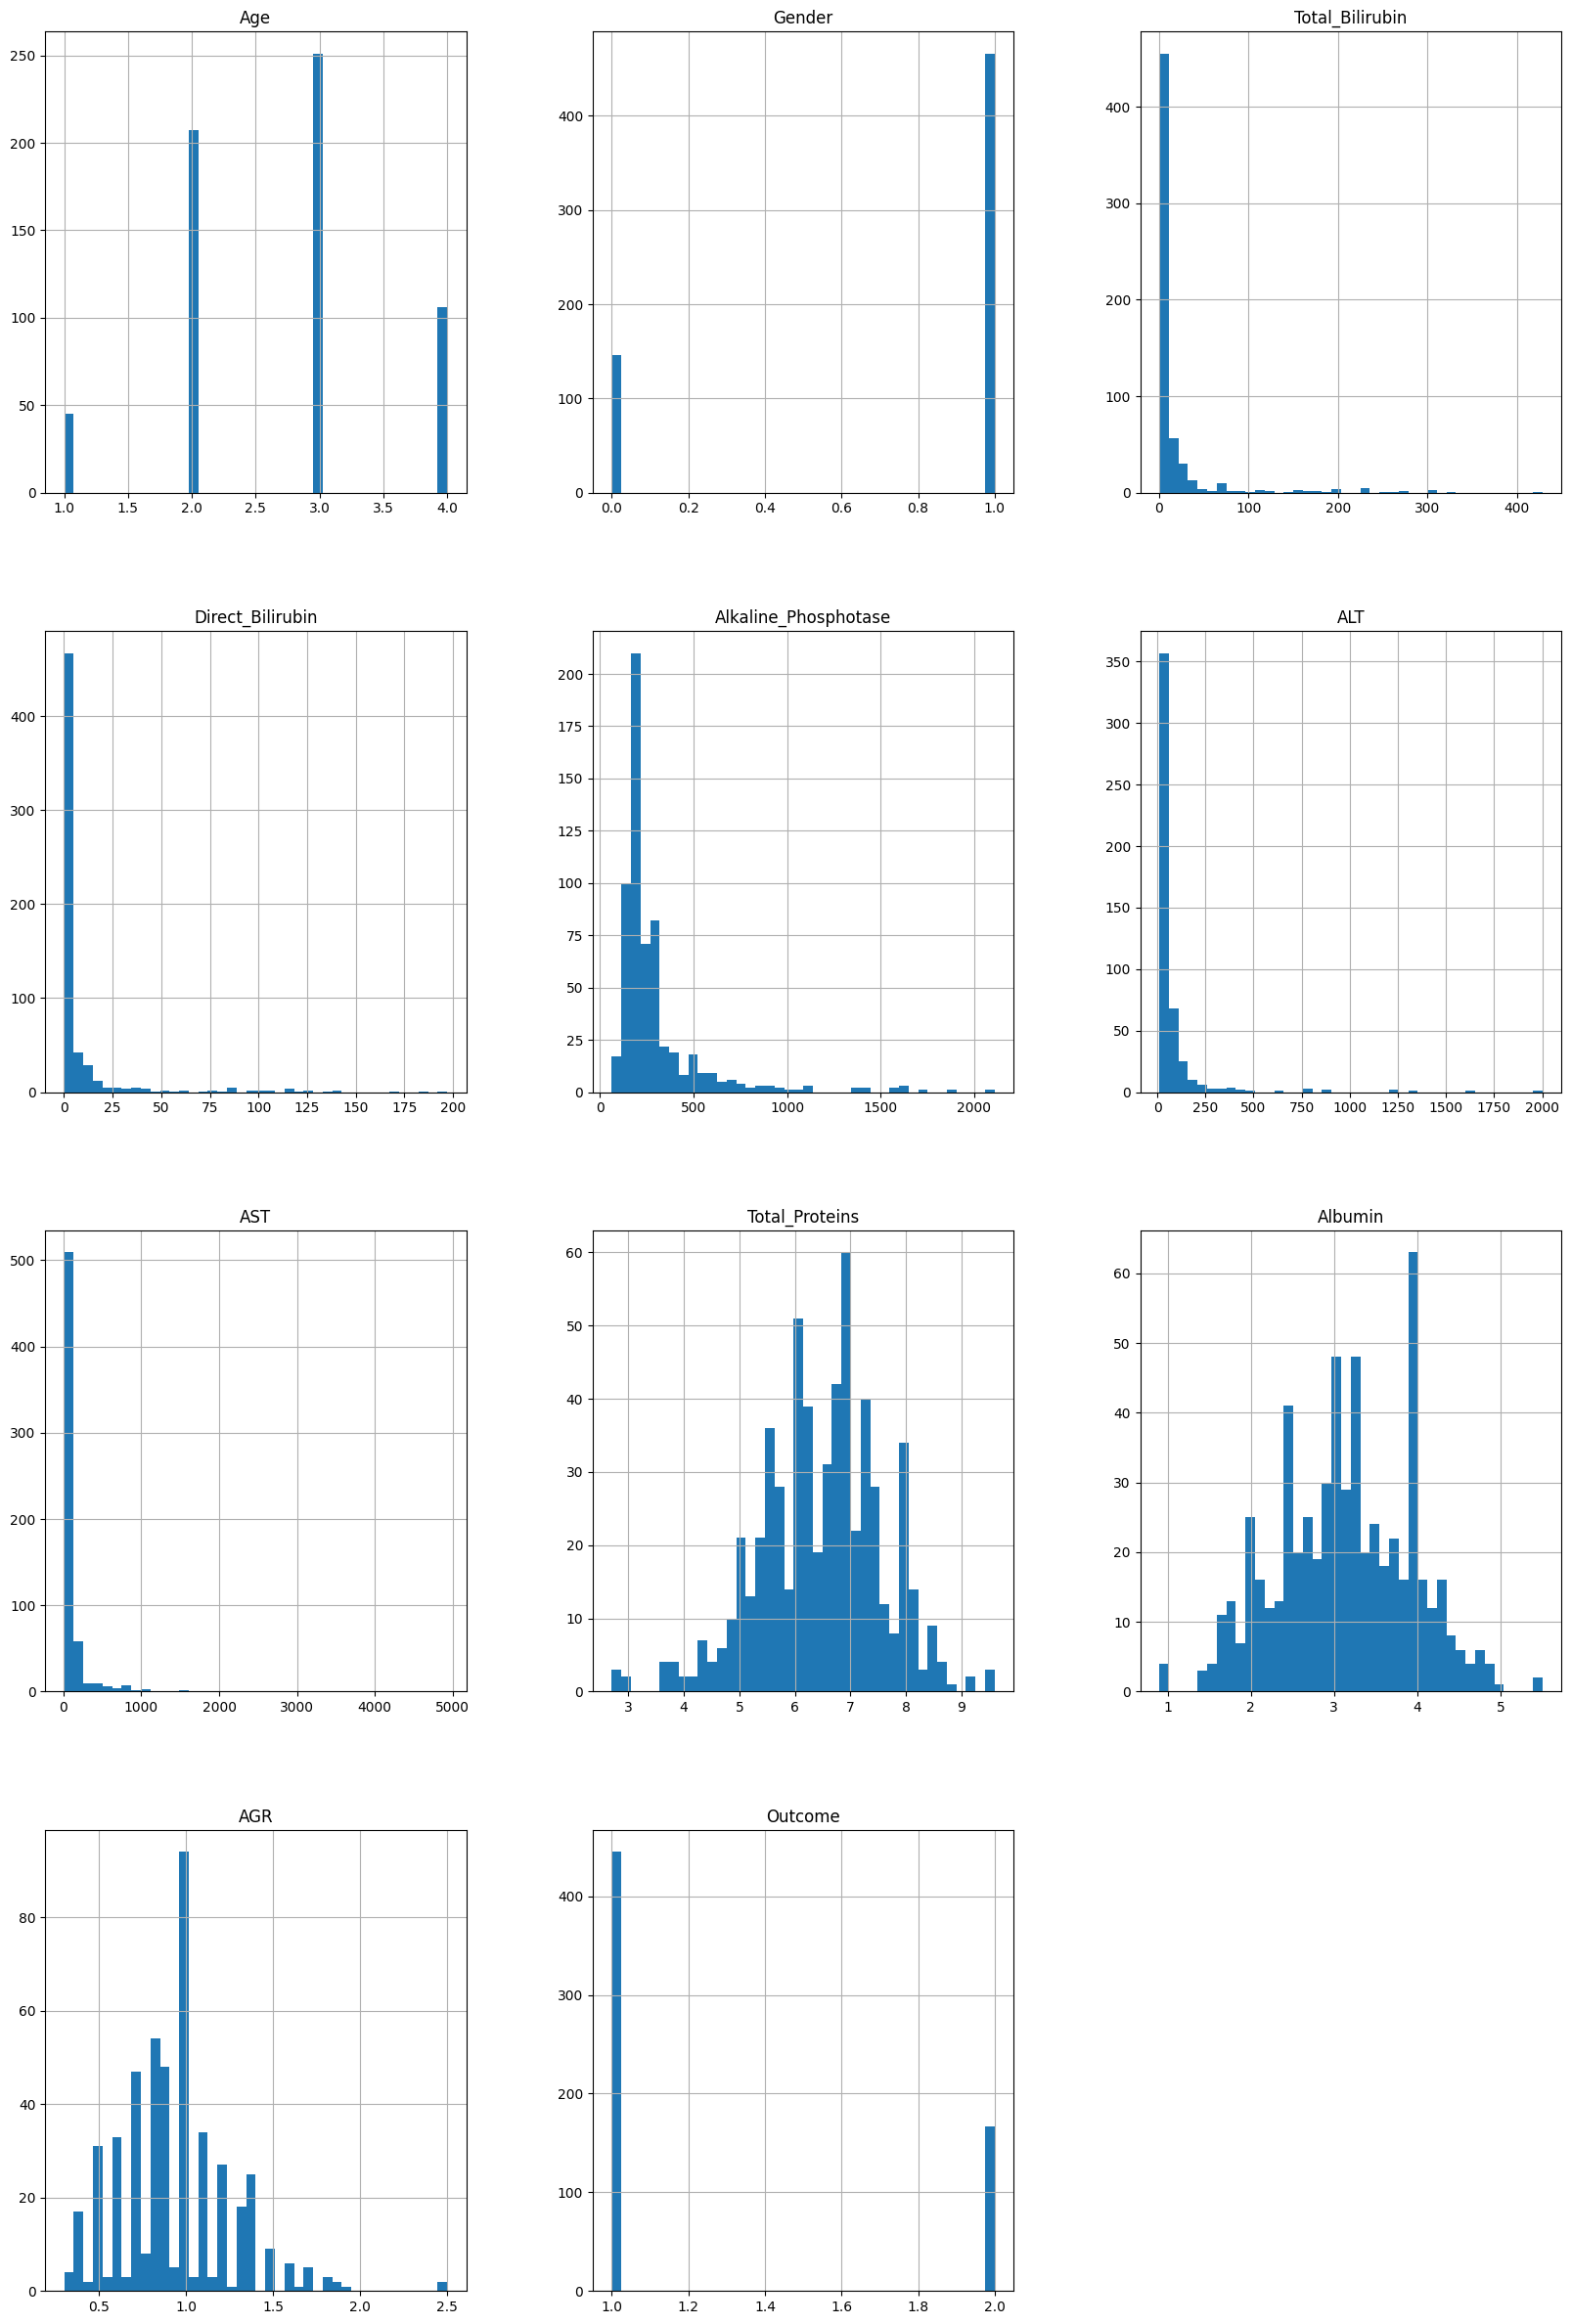

In [943]:
df_combined.hist(bins=40, figsize=(20, 30))

In [944]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   609 non-null    Int64  
 1   Gender                612 non-null    Int64  
 2   Total_Bilirubin       607 non-null    float64
 3   Direct_Bilirubin      607 non-null    float64
 4   Alkaline_Phosphotase  607 non-null    Int64  
 5   ALT                   490 non-null    float64
 6   AST                   612 non-null    int64  
 7   Total_Proteins        599 non-null    float64
 8   Albumin               606 non-null    float64
 9   AGR                   489 non-null    float64
 10  Outcome               612 non-null    int64  
dtypes: Int64(3), float64(6), int64(2)
memory usage: 54.5 KB


In [945]:
print("doublons:", df_combined.duplicated().sum())
df_combined = df_combined.drop_duplicates()

df_combined

doublons: 5


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,4,0,0.7,0.1,187,NaN,18,6.8,3.3,0.90,1
1,4,1,10.9,5.5,699,64.0,100,7.5,NaN,0.74,1
2,4,1,7.3,4.1,490,NaN,68,7.0,3.3,NaN,1
3,3,1,1.0,0.4,182,14.0,20,6.8,3.4,1.00,1
4,4,1,3.9,2.0,195,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,14.0,5.0,269,58.0,45,6.7,3.9,1.40,1
608,4,1,7.0,1.0,196,20.0,35,5.8,2.0,0.50,1
609,4,1,28.0,13.0,250,NaN,29,2.7,0.9,0.50,1
610,3,1,9.0,3.0,901,23.0,17,6.2,3.5,1.20,1


In [946]:
print("Valeurs manquantes par colonne:")
print(df_combined.isna().sum())
na_columns = df_combined.columns[df_combined.isna().any()].tolist()

Valeurs manquantes par colonne:
Age                       3
Gender                    0
Total_Bilirubin           5
Direct_Bilirubin          5
Alkaline_Phosphotase      5
ALT                     121
AST                       0
Total_Proteins           13
Albumin                   6
AGR                     123
Outcome                   0
dtype: int64


In [947]:
import pandas as pd
import numpy as np

# Remplacer les valeurs manquantes par la médiane dans df_combined
df_combined = df_combined.fillna(df_combined.median(numeric_only=True))

In [948]:
df_combined['AST'] = df_combined['AST'].fillna(-999).astype('int64').replace(-999, np.nan)
df_combined['AST'] = df_combined['AST'].astype('Int64')

In [949]:
df_combined

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,4,0,0.7,0.1,187,36.0,18,6.8,3.3,0.90,1
1,4,1,10.9,5.5,699,64.0,100,7.5,3.1,0.74,1
2,4,1,7.3,4.1,490,36.0,68,7.0,3.3,0.90,1
3,3,1,1.0,0.4,182,14.0,20,6.8,3.4,1.00,1
4,4,1,3.9,2.0,195,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,14.0,5.0,269,58.0,45,6.7,3.9,1.40,1
608,4,1,7.0,1.0,196,20.0,35,5.8,2.0,0.50,1
609,4,1,28.0,13.0,250,36.0,29,2.7,0.9,0.50,1
610,3,1,9.0,3.0,901,23.0,17,6.2,3.5,1.20,1


In [950]:
print("\nTRAITEMENT DES OUTLIERS ")

numeric_columns = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
                   'ALT', 'AST', 'Total_Proteins', 'Albumin', 'AGR']

for col in numeric_columns:
    outliers_before = len(df_combined[df_combined[col] > df_combined[col].quantile(0.95)])
    df_combined[col] = treat_outliers_iqr(df_combined[col])
    outliers_after = len(df_combined[df_combined[col] > df_combined[col].quantile(0.95)])
    print(f"{col}: {outliers_before} → {outliers_after} outliers sévères")



TRAITEMENT DES OUTLIERS 
Total_Bilirubin: 30 → 0 outliers sévères
Direct_Bilirubin: 31 → 0 outliers sévères
Alkaline_Phosphotase: 31 → 0 outliers sévères
ALT: 31 → 0 outliers sévères
AST: 30 → 0 outliers sévères
Total_Proteins: 30 → 30 outliers sévères
Albumin: 31 → 31 outliers sévères
AGR: 29 → 0 outliers sévères


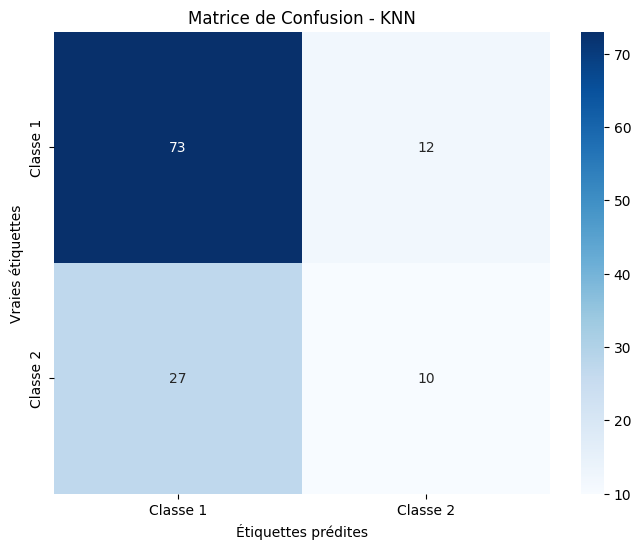

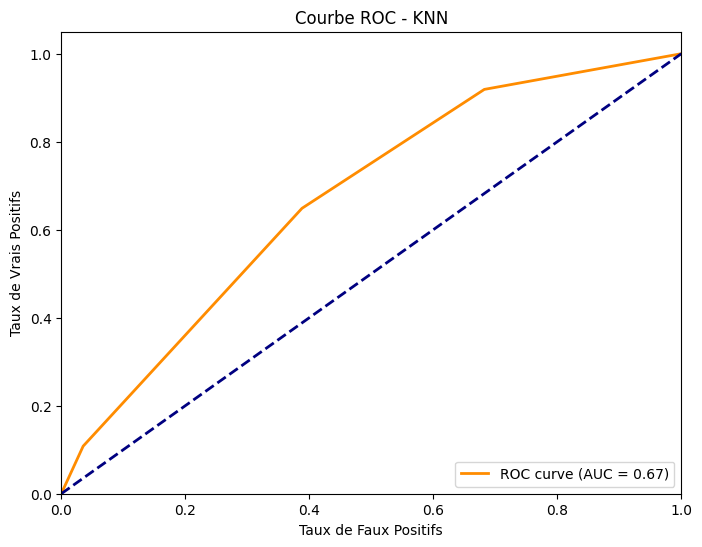

ANALYSE COMPLÈTE KNN
Accuracy: 0.6803
Precision: 0.6465
Recall: 0.6803
F1-Score: 0.6527

Classification Report Détaillé:
              precision    recall  f1-score   support

    Classe 1       0.73      0.86      0.79        85
    Classe 2       0.45      0.27      0.34        37

    accuracy                           0.68       122
   macro avg       0.59      0.56      0.56       122
weighted avg       0.65      0.68      0.65       122


Taux de bonnes prédictions: 68.03%


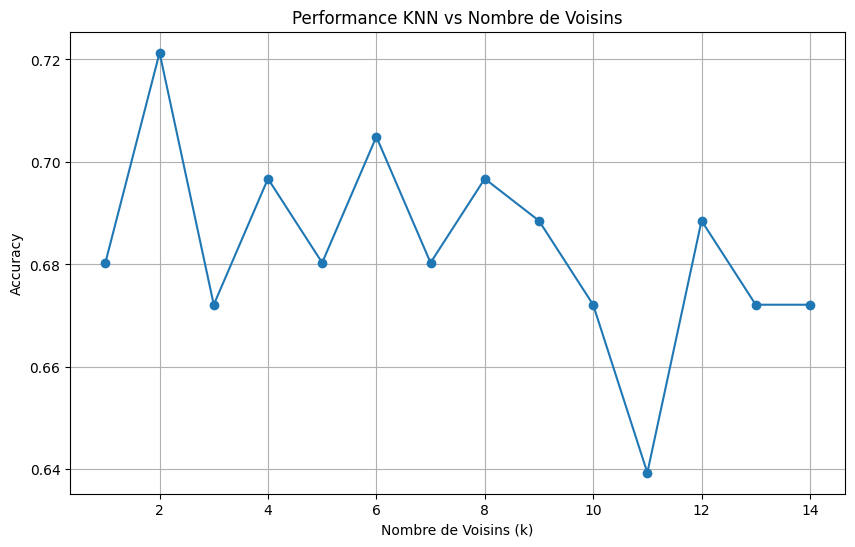


Meilleur nombre de voisins: k = 2 (Accuracy: 0.7213)

PRÉDICTION SUR ÉCHANTILLON:
Résultat prédit: Malade
Probabilités: Classe 1 = 0.000, Classe 2 = 1.000


In [959]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Préparer les données
X = df_combined.drop('Outcome', axis=1)
y = df_combined['Outcome']

# Standardiser les données (important pour KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prédictions
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)

# 1. MATRICE DE CONFUSION
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Classe 1', 'Classe 2'], 
            yticklabels=['Classe 1', 'Classe 2'])
plt.title('Matrice de Confusion - KNN')
plt.ylabel('Vraies étiquettes')
plt.xlabel('Étiquettes prédites')
plt.show()

# 2. COURBE ROC (si classification binaire)
if len(np.unique(y)) == 2:
    # Specify pos_label=2 since your labels are {1, 2}
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=2)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs')
    plt.ylabel('Taux de Vrais Positifs')
    plt.title('Courbe ROC - KNN')
    plt.legend(loc="lower right")
    plt.show()

# 3. ÉVALUATION DES PERFORMANCES
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("="*50)
print("ANALYSE COMPLÈTE KNN")
print("="*50)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report Détaillé:")
print(classification_report(y_test, y_pred, target_names=['Classe 1', 'Classe 2']))

# 4. COMPARAISON RÉELLE vs PRÉDITE
comparison = pd.DataFrame({
    'Réel': y_test.values,
    'Prédit': y_pred,
    'Correct': y_test.values == y_pred
})

print(f"\nTaux de bonnes prédictions: {comparison['Correct'].mean():.2%}")

# 5. ANALYSE DES VOISINS (optimisation)
neighbors = range(1, 15)
accuracies = []

for n in neighbors:
    knn_temp = KNeighborsClassifier(n_neighbors=n)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))

plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracies, marker='o')
plt.title('Performance KNN vs Nombre de Voisins')
plt.xlabel('Nombre de Voisins (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Meilleur k
best_k = neighbors[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"\nMeilleur nombre de voisins: k = {best_k} (Accuracy: {best_accuracy:.4f})")

# 6. PRÉDICTION SUR UN ÉCHANTILLON
sample_idx = 0
sample = X_test[sample_idx].reshape(1, -1)
sample_pred = knn.predict(sample)
sample_proba = knn.predict_proba(sample)

print(f"\nPRÉDICTION SUR ÉCHANTILLON:")
print(f"Résultat prédit: {'Malade' if sample_pred[0] == 1 else 'Non malade'}")
print(f"Probabilités: Classe 1 = {sample_proba[0][1]:.3f}, Classe 2 = {sample_proba[0][0]:.3f}")

In [952]:
# Vérifier les valeurs manquantes
print("=== VÉRIFICATION DES VALEURS MANQUANTES ===")
print(f"Total des valeurs manquantes: {df_combined.isnull().sum().sum()}")

print("\nDétail par colonne:")
nan_par_colonne = df_combined.isnull().sum()
print(nan_par_colonne[nan_par_colonne > 0])

print(f"\nPourcentage de valeurs manquantes: {(df_combined.isnull().sum().sum() / (df_combined.shape[0] * df_combined.shape[1]) * 100):.2f}%")

# Afficher les lignes qui contiennent des NaN
lignes_avec_nan = df_combined[df_combined.isnull().any(axis=1)]
print(f"\nNombre de lignes avec au moins un NaN: {len(lignes_avec_nan)}")

if len(lignes_avec_nan) > 0:
    print("\nAperçu des lignes avec NaN:")
    print(lignes_avec_nan.head())

=== VÉRIFICATION DES VALEURS MANQUANTES ===
Total des valeurs manquantes: 0

Détail par colonne:
Series([], dtype: int64)

Pourcentage de valeurs manquantes: 0.00%

Nombre de lignes avec au moins un NaN: 0


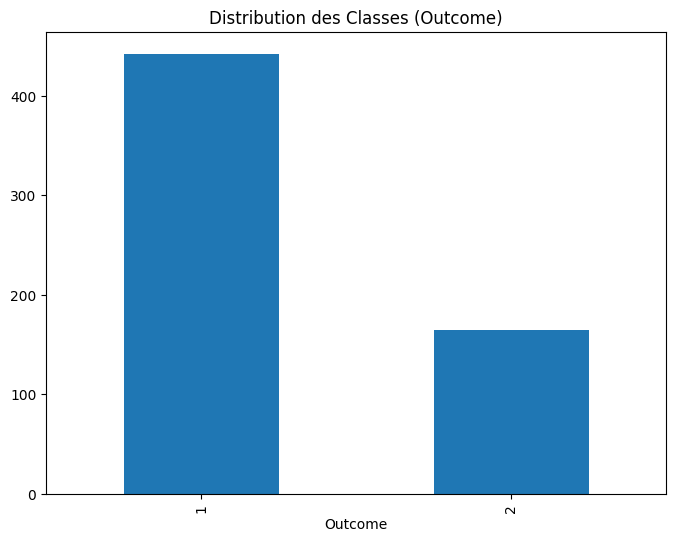

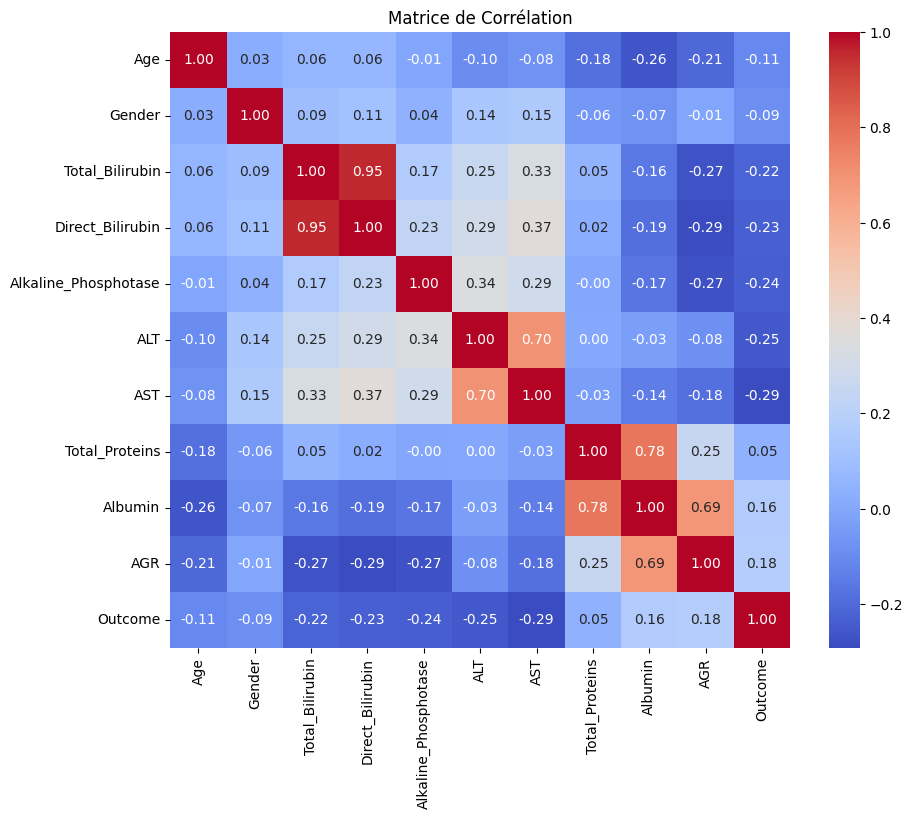

=== RAPPORT ===
Échantillons: 607, Features: 10
Valeurs manquantes: 0
Distribution Outcome:
Outcome
1    442
2    165
Name: count, dtype: int64


In [957]:
def analyze_clean_dataset_simple(df):
    """Version simplifiée de l'analyse"""
    
    # 1. Distribution des classes
    plt.figure(figsize=(8, 6))
    df['Outcome'].value_counts().plot(kind='bar')
    plt.title('Distribution des Classes (Outcome)')
    plt.show()
    
    # 2. Matrice de corrélation
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr(numeric_only=True)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Matrice de Corrélation')
    plt.show()
    
    # 3. Rapport
    print("=== RAPPORT ===")
    print(f"Échantillons: {len(df)}, Features: {len(df.columns)-1}")
    print(f"Valeurs manquantes: {df.isnull().sum().sum()}")
    print("Distribution Outcome:")
    print(df['Outcome'].value_counts())

# Utilise df_clean si défini, sinon tombe en back-up sur df_combined
try:
    analyze_clean_dataset_simple(df_clean)
except NameError:
    analyze_clean_dataset_simple(df_combined)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>],
       [<Axes: title={'center': 'Direct_Bilirubin'}>,
        <Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'ALT'}>],
       [<Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'Total_Proteins'}>,
        <Axes: title={'center': 'Albumin'}>],
       [<Axes: title={'center': 'AGR'}>,
        <Axes: title={'center': 'Outcome'}>, <Axes: >]], dtype=object)

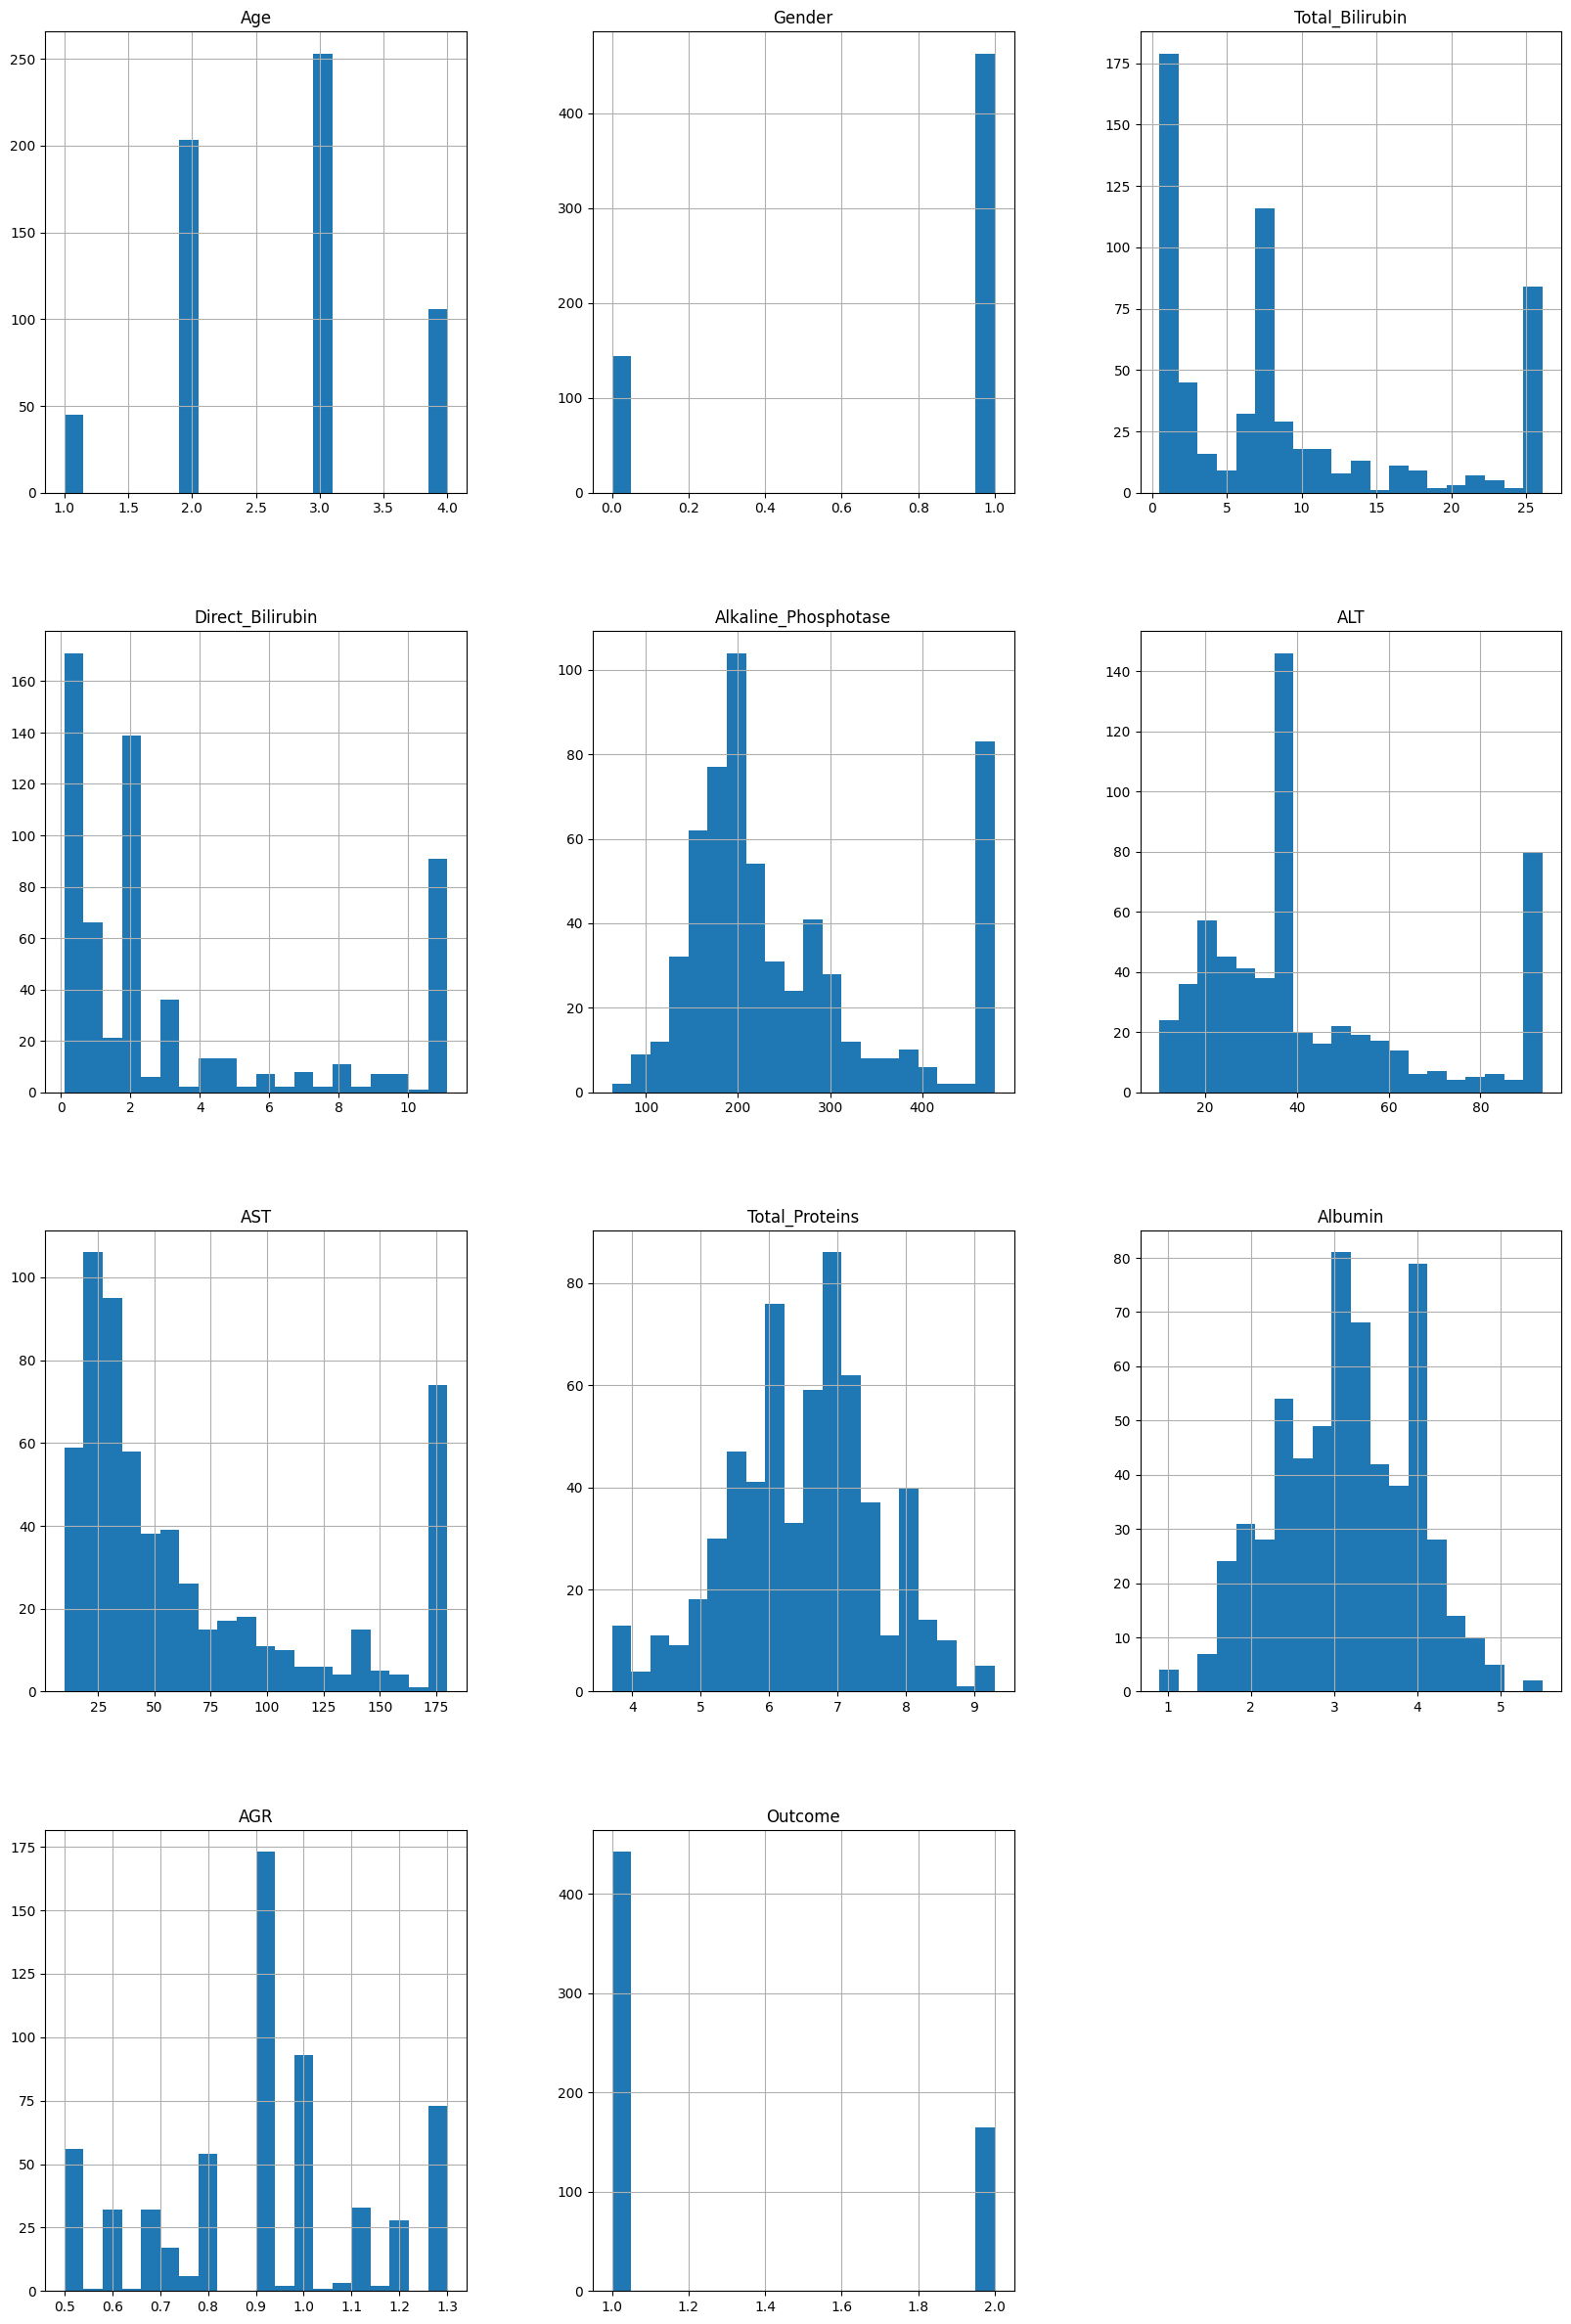

In [954]:
# '20' was being interpreted as the 'column' arg; pass bins explicitly to avoid KeyError
df_combined.hist(bins=20, figsize=(20, 30))

In [955]:
# Sauvegarder en CSV
df_combined.to_csv('dataset_combined.csv', index=False)

# Pour utiliser le fichier, toujours le relire puis convertir proprement les colonnes en entiers nullable.
df_correct = pd.read_csv('dataset_combined.csv')

# Conversion sécurisée : forcer les colonnes vers numérique, remplacer les valeurs non convertibles par NaN,
# arrondir si besoin puis caster en Int64 nullable.
for col in ['Age', 'Gender', 'Alkaline_Phosphotase']:
    if col in df_correct.columns:
        df_correct[col] = pd.to_numeric(df_correct[col], errors='coerce')  # non numériques → NaN
        # arrondir pour gérer les floats équivalents à des entiers (ex. 182.0)
        df_correct[col] = df_correct[col].round(0)
        df_correct[col] = df_correct[col].astype('Int64')

print("Utilisez df_correct pour avoir les mêmes données que l'original")
print(df_correct.head())
print(df_correct.dtypes)

Utilisez df_correct pour avoir les mêmes données que l'original
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase   ALT  \
0    4       0              0.7               0.1                   187  36.0   
1    4       1             10.9               5.5                   479  64.0   
2    4       1              7.3               4.1                   479  36.0   
3    3       1              1.0               0.4                   182  14.0   
4    4       1              3.9               2.0                   195  27.0   

     AST  Total_Proteins  Albumin   AGR  Outcome  
0   18.0             6.8      3.3  0.90        1  
1  100.0             7.5      3.1  0.74        1  
2   68.0             7.0      3.3  0.90        1  
3   20.0             6.8      3.4  1.00        1  
4   59.0             7.3      2.4  0.50        1  
Age                       Int64
Gender                    Int64
Total_Bilirubin         float64
Direct_Bilirubin        float64
Alkaline_Phosph

In [956]:
stoooop

NameError: name 'stoooop' is not defined

In [ ]:
'https://www.geeksforgeeks.org/machine-learning/random-forest-algorithm-in-machine-learning/'
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')


medical_data = medical_data.dropna(subset=['Outcome'])  

# Sélectionner les features de VOTRE dataset
X = medical_data[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 
                  'Alkaline_Phosphotase', 'ALT', 'AST', 'Total_Proteins', 
                  'Albumin', 'AGR']]  # Vos colonnes médicales

y = medical_data['Outcome']  # Votre variable cible

# Gérer les valeurs manquantes dans les features
for col in X.columns:
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].median())

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Prédictions
y_pred = rf_classifier.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

# Prédiction sur un échantillon
sample = X_test.iloc[0:1]
prediction = rf_classifier.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Patient: {sample_dict}")
print(f"Predicted Outcome: {'Malade' if prediction[0] == 1 else 'Non malade'}")

Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.86      0.78        85
           2       0.40      0.22      0.28        37

    accuracy                           0.66       122
   macro avg       0.56      0.54      0.53       122
weighted avg       0.62      0.66      0.63       122


Sample Patient: {'Age': 1.0, 'Gender': 0.0, 'Total_Bilirubin': 26.075000000000003, 'Direct_Bilirubin': 11.125, 'Alkaline_Phosphotase': 200.0, 'ALT': 91.0, 'AST': 101.0, 'Total_Proteins': 6.9, 'Albumin': 3.5, 'AGR': 0.9}
Predicted Outcome: Malade


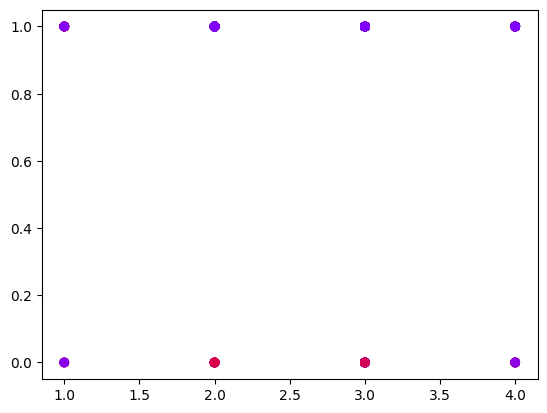

In [ ]:
# If X is a pandas DataFrame, use .iloc to index columns (or convert to numpy with .values)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.5, c=y, cmap='rainbow')

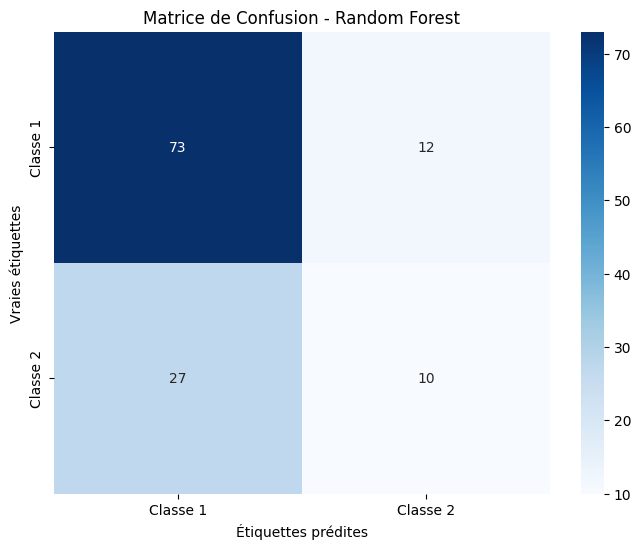

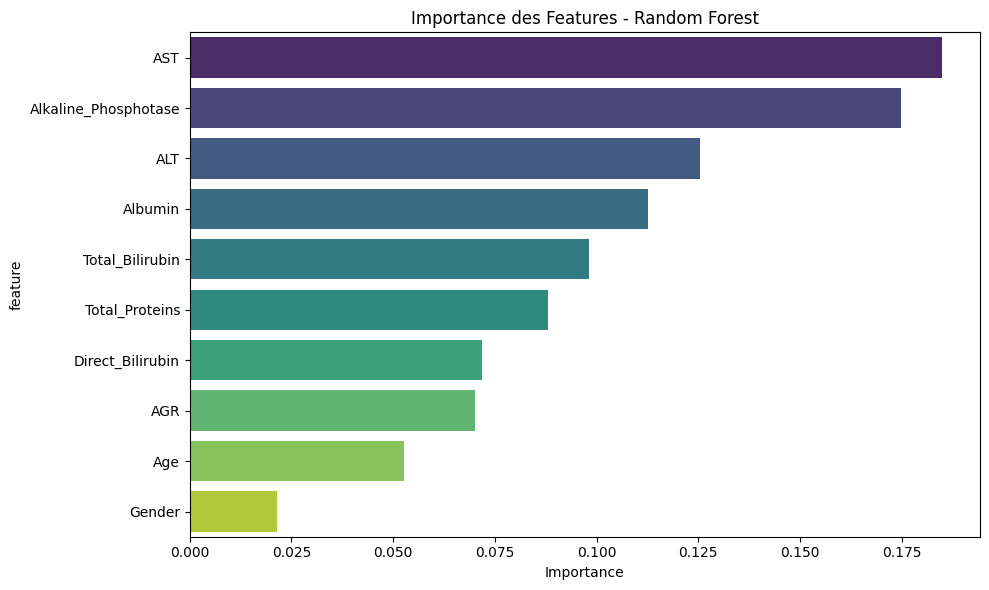

TOP 5 DES FEATURES LES PLUS IMPORTANTES:
                feature  importance
6                   AST    0.184988
4  Alkaline_Phosphotase    0.174728
5                   ALT    0.125528
8               Albumin    0.112674
2       Total_Bilirubin    0.098031


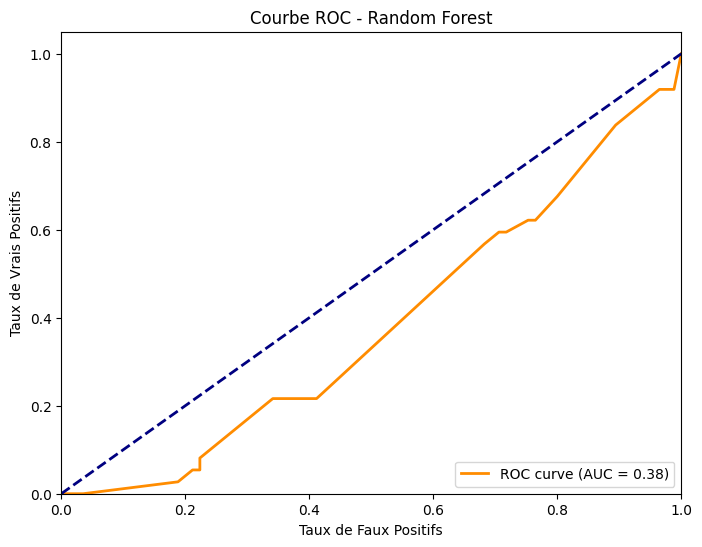

ANALYSE COMPLÈTE RANDOM FOREST
Accuracy: 0.6639
Precision: 0.6465
Recall: 0.6803
F1-Score: 0.6527


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np

# 1. MATRICE DE CONFUSION
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Classe 1', 'Classe 2'], 
            yticklabels=['Classe 1', 'Classe 2'])
plt.title('Matrice de Confusion - Random Forest')
plt.ylabel('Vraies étiquettes')
plt.xlabel('Étiquettes prédites')
plt.show()

# 2. IMPORTANCE DES FEATURES
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Importance des Features - Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print("TOP 5 DES FEATURES LES PLUS IMPORTANTES:")
print(feature_importance.head())

# 3. COURBE ROC (si classification binaire)
if len(np.unique(y)) == 2:
    y_pred_proba = rf_classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=2)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs')
    plt.ylabel('Taux de Vrais Positifs')
    plt.title('Courbe ROC - Random Forest')
    plt.legend(loc="lower right")
    plt.show()

# 4. RAPPORT DÉTAILLÉ DES PERFORMANCES
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("="*50)
print("ANALYSE COMPLÈTE RANDOM FOREST")
print("="*50)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")